In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("weight-height.csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

# Univariate analysis

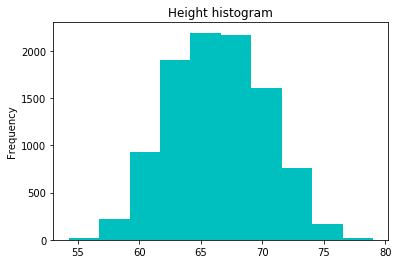

In [6]:
df.Height.plot(kind="hist", title="Height histogram", color='c')

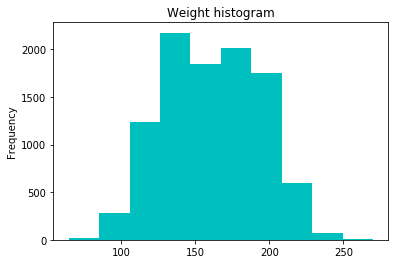

In [7]:
df.Weight.plot(kind="hist", title="Weight histogram", color='c')

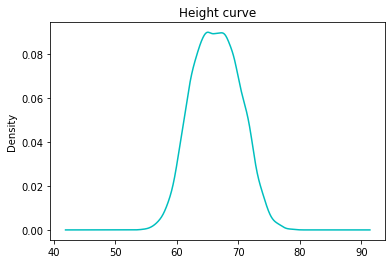

In [9]:
df.Height.plot(kind="kde", title="Height curve", color='c')

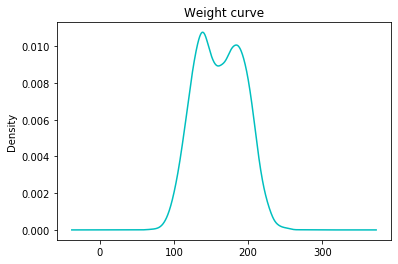

In [10]:
df.Weight.plot(kind="kde", title="Weight curve", color='c')

# Bivariate Analysis

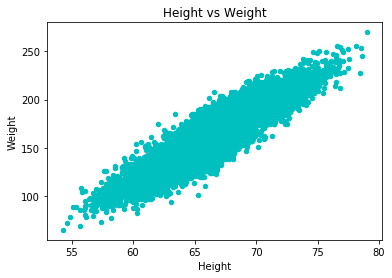

In [11]:
df.plot.scatter(x="Height", y="Weight", color='c', title="Height vs Weight")

# Regression

In [12]:
X= df.iloc[:,1:2].values
y= df.iloc[:,2:3].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [16]:
model_fit = lr.fit(X_train, y_train)

In [17]:
y_pred = lr.predict(X_test)

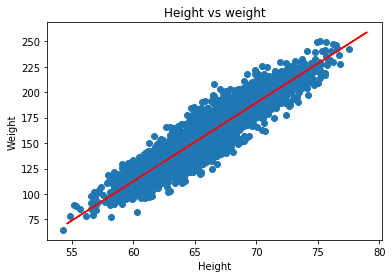

In [19]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color='r')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs weight")
plt.show()

In [21]:
from sklearn.metrics import r2_score
print("Model accuracy is : ",lr.score(X_test,y_test)*100)

Model accuracy is :  86.1509106542504


In [22]:
r2_score(y_test, y_pred)

0.861509106542504

# Classification of Gender

In [23]:
X_g = df.iloc[:,1:3].values
y_g = df.iloc[:,0:1].values

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
y_g = le.fit_transform(y_g)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
y_g

array([1, 1, 1, ..., 0, 0, 0])

In [27]:
X_g_train, X_g_test, y_g_train, y_g_test = train_test_split(X_g, y_g, test_size=0.3, random_state=31)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [29]:
knn.fit(X_g_train, y_g_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [30]:
y_g_pred = knn.predict(X_g_test)

In [31]:
y_g_pred

array([0, 1, 0, ..., 1, 0, 0])

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_g_test,y_g_pred)

array([[1315,  157],
       [ 138, 1390]], dtype=int64)

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_g_train, y_g_train)
y_g_pred = knn.predict(X_g_test)
confusion_matrix(y_g_test,y_g_pred)

array([[1330,  142],
       [ 135, 1393]], dtype=int64)

In [38]:
print("KNN gender accuracy is : ",knn.score(X_g_test, y_g_test))

KNN gender accuracy is :  0.9076666666666666
